# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

Oppgave 1 - Finn likevektspris og -kvantum for alle verdier av $t$ 

In [2]:
def demand(p):
    return 500-3.2*p

def supply(p, t):
    return -100+4.3*(p-t)

p, t, x = sp.symbols('p t x', real=True, positive=True)
condition= sp.Eq(demand(p),supply(p, t))
condition


Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

In [3]:
likepris = sp.solve(condition, p)
likepris

[0.573333333333333*t + 80.0]

In [4]:
likekvantum = demand(likepris[0])
likekvantum

244.0 - 1.83466666666667*t

In [5]:
print('Likevektspris er', likepris[0], 'og likevektskvantumet er', likekvantum)

Likevektspris er 0.573333333333333*t + 80.0 og likevektskvantumet er 244.0 - 1.83466666666667*t


Oppgave 2 - Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny. 

In [69]:
# Uttyrkket for konsumentoverskudd
likepris_fun = sp.lambdify([t,p],likepris)
likevekts_pris = likepris_fun(0,0)[0]
likevekts_pris

80.0

In [7]:
#Uttrykket for produsentoverskudd
likekvantum_fun = sp.lambdify([t,p],likekvantum)
likevekts_kvantum = likekvantum_fun(0,0)
likevekts_kvantum

244.0

In [8]:
#Uttrykket for avgiftsproveny
def avgiftsproveny(t):
    return t*likekvantum_fun(t,0)

avgiftsproveny(t)

t*(244.0 - 1.83466666666667*t)

Oppgave 3 - Tegn likevekten for $t=0$ og fargelegg KO og PO.

In [9]:
eq_demand = sp.Eq(500-3.2*p,x)
eq_supply = sp.Eq(-100+4.3*(p-t),x)

eq_demand_inv = sp.solve(eq_demand, p)
eq_supply_inv = sp.solve(eq_supply, p)

def demand_inv(x):
    return 156.25-0.3125*x

def supply_inv(x, t):
    return t + 0.232558139534884*x + 23.2558139534884

In [10]:
print(eq_demand_inv)
print(eq_supply_inv)

[156.25 - 0.3125*x]
[t + 0.232558139534884*x + 23.2558139534884]


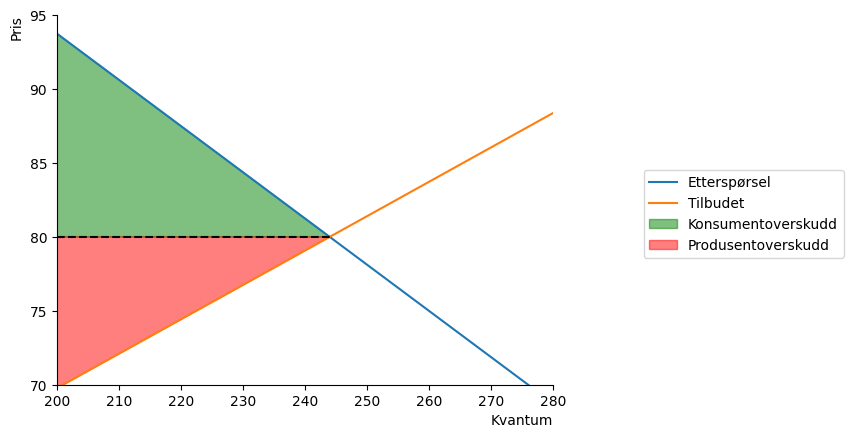

In [48]:
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris', loc='top')
                ax.set_xlabel('Kvantum', loc='right')
                ax.set(xlim=(200,280))
                ax.set(ylim=(70,95))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

p_num = np.linspace(0.1,100,100)
q = np.linspace(80,likevekts_kvantum,100)
q_2 = np.linspace(80,0,100)


ax.plot(demand(p_num),p_num, label='Etterspørsel') 
ax.plot(supply(p_num,0),p_num, label='Tilbudet')


likevekt_linje = ax.hlines(80,200,likekvantum_fun(0,0), colors="black", ls="dashed")

ax.fill_between(demand(q),q,80, color='green', alpha=0.5, label='Konsumentoverskudd')
ax.fill_between(supply(q_2,0),80,q_2, color='red', alpha=0.5, label='Produsentoverskudd')

ax.legend(bbox_to_anchor=(1.6,0.6))


Oppgave 4 - Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.

In [77]:
#Likepunkt med avgifter
likevekts_pris_avgift = likepris_fun(4,0)[0]
likevekts_kvantum_avgift = likekvantum_fun(4,0)

display(likevekts_pris_avgift)
likevekts_kvantum_avgift

82.29333333333334

236.66133333333332

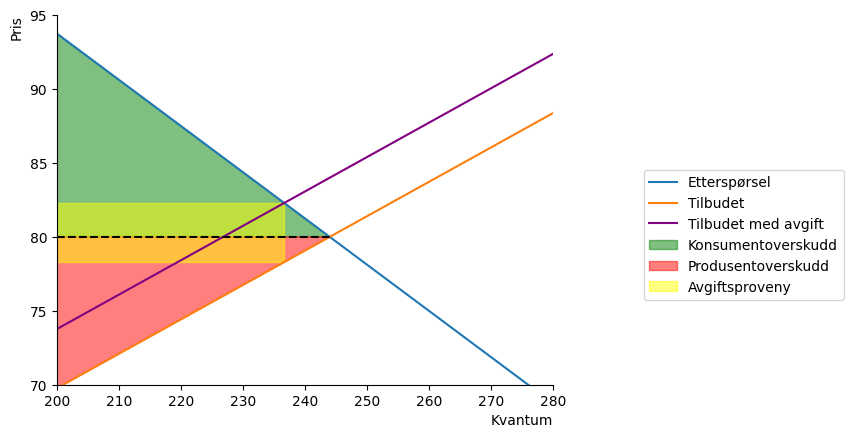

In [110]:
fig, ax = create_ax()

ax.plot(demand(p_num),p_num, label='Etterspørsel') 
ax.plot(supply(p_num,0),p_num, label='Tilbudet')
ax.plot(supply(p_num,4),p_num, label='Tilbudet med avgift', color='purple')

likevekt_linje = ax.hlines(80,200,likekvantum_fun(0,0), colors="black", ls="dashed")

q_3 = (likevekts_kvantum_avgift,0,100)

ax.fill_between(demand(q),q,80, color='green', alpha=0.5, label='Konsumentoverskudd')
ax.fill_between(supply(q_2,0),80,q_2, color='red', alpha=0.5, label='Produsentoverskudd')
ax.fill_between(q_3,likevekts_pris_avgift,likevekts_pris_avgift-4, color = 'yellow', alpha=0.5, label='Avgiftsproveny')


ax.legend(bbox_to_anchor=(1.6,0.6))

Oppgave 5 - Bruk de uttrykkene som du har laget for å fylle ut følgende tabell.

In [157]:
#Regner ut konsumenoverskudd
konsumentoverskudd = sp.integrate(demand(p)-likevekts_pris, (p,0,likevekts_kvantum_avgift,))

konsumentoverskudd_avgift = sp.integrate(demand(p)-likevekts_pris_avgift, (p,0,likevekts_kvantum_avgift,))

display(konsumentoverskudd)
konsumentoverskudd_avgift


9784.02128782222

9241.27796337777

In [162]:
#Regner ut produsentoverskudd
produsentoverskudd = sp.integrate(likevekts_pris-supply(p,0), (p,0,likevekts_kvantum,))

produsentoverskudd_avgift = sp.integrate(likevekts_pris-supply(p,4), (p,0,likevekts_kvantum_avgift,))

display(konsumentoverskudd_avgift)
produsentoverskudd

9241.27796337777

-84082.4000000000

In [165]:
from IPython.display import Markdown

tbl=f""""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   | ${likevekts_pris}$ |${likevekts_pris_avgift}$ |${likevekts_pris_avgift-likevekts_pris}$  |
|Produsentpris  |${likevekts_pris}$ | ${likevekts_pris_avgift-4}$  |  ${likevekts_pris_avgift-likevekts_pris}$|
|Kvantum  | ${likevekts_kvantum}$ | ${likevekts_kvantum_avgift}$  |  ${likevekts_kvantum_avgift-likevekts_kvantum}$  |
| Konsumentoverskudd: | ${konsumentoverskudd}$ |${konsumentoverskudd_avgift}$ | ${konsumentoverskudd-konsumentoverskudd_avgift}$    |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||
"""

display(Markdown(tbl))

"
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   | $80.0$ |$82.29333333333334$ |$2.2933333333333366$  |
|Produsentpris  |$80.0$ | $78.29333333333334$  |  $2.2933333333333366$|
|Kvantum  | $244.0$ | $236.66133333333332$  |  $-7.338666666666683$  |
| Konsumentoverskudd: | $9784.02128782222$ |$9241.27796337777$ | $542.743324444455$    |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||
